In [1]:
import pandas as pd
df = pd.read_csv("ce1dc0436aba5b7a5c9666f47fa5a380-5ce3854392b43ff97907112d344fc008229b0445/titanic.csv",sep=",")
df

,PassengerId,Survived,Pclass,Lname,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,Braund,Mr. Owen Harris,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,Cumings,Mrs. John Bradley (Florence Briggs Thayer),female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,Heikkinen,Miss. Laina,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,Futrelle,Mrs. Jacques Heath (Lily May Peel),female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,Allen,Mr. William Henry,male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...
151,152,1,1,Pears,Mrs. Thomas (Edith Wearne),female,22.0,1,0,113776,66.6000,C2,S
152,153,0,3,Meo,Mr. Alfonzo,male,55.5,0,0,A.5. 11206,8.0500,NaN,S
153,154,0,3,van Billiard,Mr. Austin Blyler,male,40.5,0,2,A/5. 851,14.5000,NaN,S
154,155,0,3,Olsen,Mr. Ole Martin,male,NaN,0,0,Fa 265302,7.3125,NaN,S


In [2]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Lname            0
Name             0
Sex              0
Age             30
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          125
Embarked         1
dtype: int64

In [3]:
df['Age'].unique()

array([22.  , 38.  , 26.  , 35.  ,   nan, 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  , 28.  ,
        8.  , 19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  ,
       49.  , 29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  ,
       16.  , 25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  ,
       71.  , 37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 ,
       51.  , 55.5 , 40.5 ])

In [4]:
df['Age'].fillna(df['Age'].mean(), inplace=True)

In [23]:
df['Cabin'].unique()

array(['C123', 'C85', 'D26', nan, 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2'], dtype=object)

In [40]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Lname          0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       1
dtype: int64

In [39]:
df['Cabin'].fillna(df['Cabin'].mode()[0], inplace=True)

In [38]:
df['Cabin'].mode()[0]

'C123'

In [41]:
df['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [45]:
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

In [44]:
df['Embarked'].mode()[0]

'S'

In [46]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Lname          0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

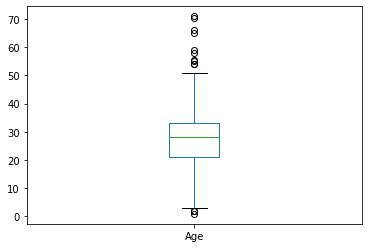

In [49]:
import matplotlib as plt

df[['Age',"Sex"]].plot.box()

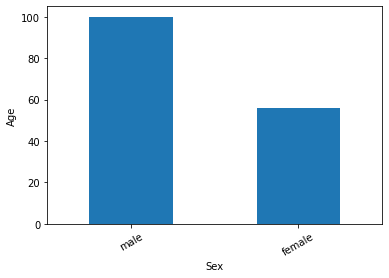

In [52]:
from matplotlib import pyplot as plt
plt.xlabel('Sex')
plt.ylabel('Age')
vc= df['Sex'].value_counts()
vc.plot.bar(rot=30)

In [ ]:
The plot shows the difference between male and female regarding age. As is presented in the bar chart males live the longest reaching the age of 100 , while the figure for female experienced the lowest with approximately 60


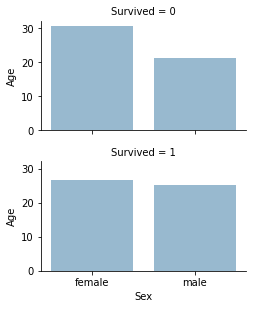

In [62]:
import seaborn as sns
grid = sns.FacetGrid(df, row="Survived", size=2.2, aspect=1.6)
grid.map(sns.barplot, "Sex", 'Age', alpha=.5, ci=None)
grid.add_legend()

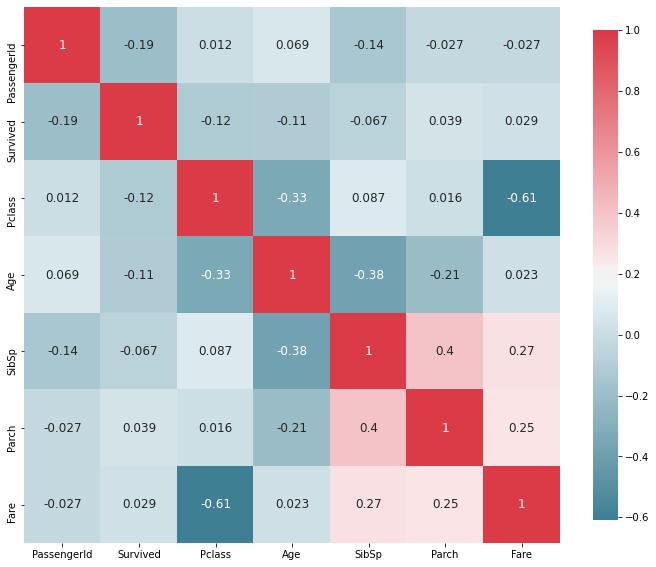

In [86]:
def plot_correlation_map( df ):

    corr = df.corr()

    s , ax = plt.subplots( figsize =( 12 , 10 ) )

    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )

    s = sns.heatmap(

        corr, 

        cmap = cmap,

        square=True, 

        cbar_kws={ 'shrink' : .9 }, 

        ax=ax, 

        annot = True, 

        annot_kws = { 'fontsize' : 12 })

plot_correlation_map(df)


In [87]:
c = df.groupby('Survived').Pclass.mean()
c

Survived
0    2.490196
1    2.296296
Name: Pclass, dtype: float64

In [99]:
title_Dictionary  = {

                    "Capt":       "Officer",

                    "Col":        "Officer",

                    "Major":      "Officer",

                      "Dr":         "Officer",

                    "Rev":           'Officer' ,

                    "Jonkheer":   "Royalty",

                    "Don":        "Royalty",

                    "Sir" :       "Royalty",

                   "Lady" :      "Royalty" ,

                  "the Countess": "Royalty",

                    "Dona":       'Royalty' ,

                    "Mme":        "Miss",

                    "Mlle":       "Miss",

                    "Miss" :      "Miss",

                    "Ms":         "Mrs",

                    "Mr" :        "Mrs",

                    "Mrs" :       "Mrs" ,

                    "Master" :    "Master"

                    }



In [107]:
titles = title_Dictionary.keys()
titles

dict_keys(['Capt', 'Col', 'Major', 'Dr', 'Rev', 'Jonkheer', 'Don', 'Sir', 'Lady', 'the Countess', 'Dona', 'Mme', 'Mlle', 'Miss', 'Ms', 'Mr', 'Mrs', 'Master'])

In [116]:
for i,row in df.iterrows():
    name = row["Name"]
    for title in titles:
        if title in name:
            df.loc[i,"Title"] = title

In [117]:
df.replace(title_Dictionary,inplace=True)

In [118]:
df["Title"].values

array(['Mrs', 'Mrs', 'Miss', 'Mrs', 'Mrs', 'Mrs', 'Mrs', 'Master', 'Mrs',
       'Mrs', 'Miss', 'Miss', 'Mrs', 'Mrs', 'Miss', 'Mrs', 'Master',
       'Mrs', 'Mrs', 'Mrs', 'Mrs', 'Mrs', 'Miss', 'Mrs', 'Miss', 'Mrs',
       'Mrs', 'Mrs', 'Miss', 'Mrs', 'Royalty', 'Mrs', 'Miss', 'Mrs',
       'Mrs', 'Mrs', 'Mrs', 'Mrs', 'Miss', 'Miss', 'Mrs', 'Mrs', 'Mrs',
       'Miss', 'Miss', 'Mrs', 'Mrs', 'Miss', 'Mrs', 'Mrs', 'Master',
       'Mrs', 'Mrs', 'Mrs', 'Mrs', 'Mrs', 'Miss', 'Mrs', 'Miss', 'Master',
       'Mrs', 'Miss', 'Mrs', 'Master', 'Mrs', 'Master', 'Mrs', 'Mrs',
       'Miss', 'Mrs', 'Mrs', 'Miss', 'Mrs', 'Mrs', 'Mrs', 'Mrs', 'Mrs',
       'Mrs', 'Master', 'Miss', 'Mrs', 'Mrs', 'Miss', 'Mrs', 'Miss',
       'Mrs', 'Mrs', 'Mrs', 'Miss', 'Mrs', 'Mrs', 'Mrs', 'Mrs', 'Mrs',
       'Mrs', 'Mrs', 'Mrs', 'Mrs', 'Mrs', 'Mrs', 'Miss', 'Mrs', 'Mrs',
       'Mrs', 'Mrs', 'Mrs', 'Miss', 'Mrs', 'Mrs', 'Miss', 'Mrs', 'Miss',
       'Mrs', 'Miss', 'Miss', 'Mrs', 'Mrs', 'Mrs', 'Mrs', 'Miss', 'Mrs',
 

In [127]:
df['FamilySize']= df["Parch"]+ df["SibSp"]

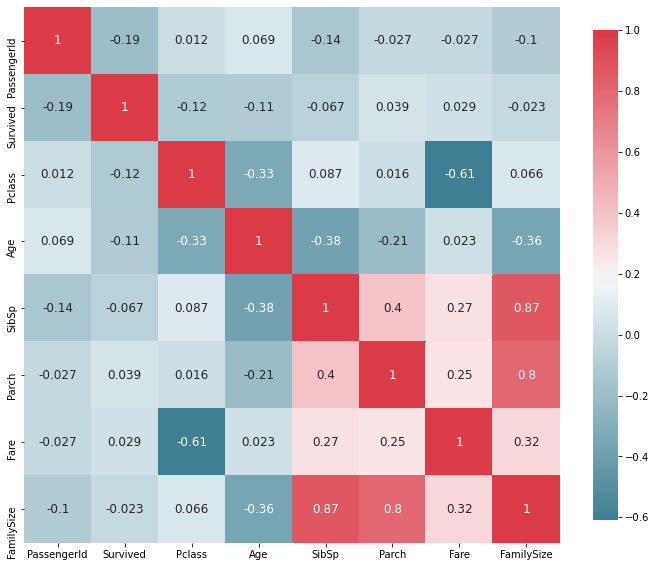

In [131]:
plot_correlation_map(df)

In [ ]:
passengerld, Pclass et Age sont  Parch Fare